# Fišerův problém

## Úvod

V tomto praktiku si předvedeme určení neznámé veličiny $C(T)$ definované jako součin $$C(T) = A(T) \, B(T),$$ přičemž veličiny $A(T)$, $B(T)$ jsme určili měřením. Určíme zároveň směrnici závislosti veličiny $C$ na $T$.

## Měření

jsme si velice šikovně zapsali do souboru, jako tzv. "comma separated value" (CSV) format už v průběhu měření do souboru ``data.txt``:

In [1]:
ls

convert_to_pdf.sh*    praktikum.ipynb       praktikum_pdf.tex
data.csv              praktikum_pdf_files/  README.rst
praktikum_html.html   praktikum_pdf.ipynb   revtex_nocode.tplx
praktikum_html.ipynb  praktikum_pdf.pdf


In [2]:
!cat data.csv

T,A,B
15.0,0.1734,459.0
16.0,0.1782,450.0
17.0,0.1831,441.0
18.0,0.1880,435.0
19.0,0.1928,427.0
20.0,0.1976,419.0
21.0,0.2024,411.0


Data načteme pomocí funkce ``read_csv`` z balíku ``pandas``. ``Pandas`` je třeba nejprve naimportovat:

In [3]:
import pandas

In [4]:
pandas.read_csv?

In [5]:
data = pandas.read_csv('data.csv')

Vznikla proměnná ``data`` představuje tzv. ``DataFrame``. ``DataFrame`` si lze představit jako tabulku, jeho vizualizace je v jupyter notebooku velice jednoduchá

In [6]:
data

,T,A,B
0,15.0,0.1734,459.0
1,16.0,0.1782,450.0
2,17.0,0.1831,441.0
3,18.0,0.1880,435.0
4,19.0,0.1928,427.0
5,20.0,0.1976,419.0
6,21.0,0.2024,411.0


Dopočítáme veličinu $C$:

In [7]:
data['C'] = data['A'] * data['B']

In [8]:
data

,T,A,B,C
0,15.0,0.1734,459.0,79.5906
1,16.0,0.1782,450.0,80.1900
2,17.0,0.1831,441.0,80.7471
3,18.0,0.1880,435.0,81.7800
4,19.0,0.1928,427.0,82.3256
5,20.0,0.1976,419.0,82.7944
6,21.0,0.2024,411.0,83.1864


Základní grafická vizualizace dat je také velice jednoduchá:

In [9]:
import matplotlib.pyplot
%matplotlib inline

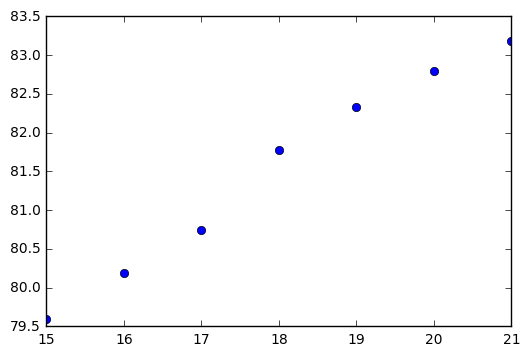

In [10]:
matplotlib.pyplot.plot(data['T'], data['C'], 'o')

Fitování naměřené zavislosti přímkou je lehce náročnější:

In [11]:
import scipy.optimize

def f(x, C0, C1):
    return C0 * x + C1

popt, pcov = scipy.optimize.curve_fit(f, data['T'], data['C'])

In [12]:
scipy.optimize.curve_fit?

Parametry $C_0$ a $C_1$ jsou v poli ``popt``:

In [13]:
print(popt)

[  0.62766786  70.21827857]


Kovarianční matice:

In [14]:
print(pcov) # vypocet statistickych chyb pozdeji

[[ 0.00125189 -0.02253399]
 [-0.02253399  0.41061944]]


Konečně vyneseme závislost do grafu i s fitem:

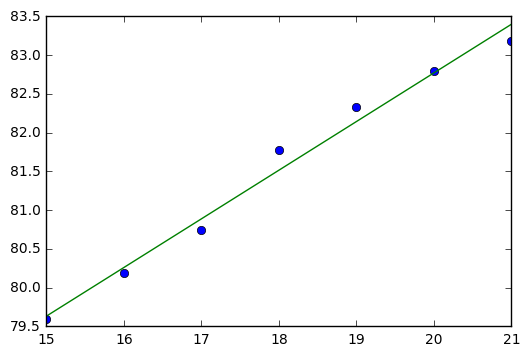

In [15]:
matplotlib.pyplot.plot(data['T'], data['C'], 'o')
y = f(data['T'], popt[0], popt[1]) # y = C0 * x + C1
matplotlib.pyplot.plot(data['T'], y)

O něco hezčí grafy lze vytvořit s "trochou" námahy:

In [16]:
matplotlib.pyplot.rcParams['figure.autolayout'] = False
matplotlib.pyplot.rcParams['figure.figsize'] = 12, 7
matplotlib.pyplot.rcParams['axes.labelsize'] = 25
matplotlib.pyplot.rcParams['axes.titlesize'] = 25
matplotlib.pyplot.rcParams['font.size'] = 25
matplotlib.pyplot.rcParams['lines.linewidth'] = 2.0
matplotlib.pyplot.rcParams['lines.markersize'] = 12
matplotlib.pyplot.rcParams['legend.fontsize'] = 25
matplotlib.pyplot.rcParams['text.usetex'] = True
matplotlib.pyplot.rcParams['text.latex.unicode'] = True
matplotlib.pyplot.rcParams['font.family'] = "serif"
matplotlib.pyplot.rcParams['font.serif'] = "cm"
matplotlib.pyplot.rcParams['xtick.major.pad'] = 10.0
matplotlib.pyplot.rcParams['ytick.major.pad'] = 10.0
matplotlib.pyplot.rcParams['text.latex.preamble'] = r"\usepackage{subdepth}, \usepackage{type1cm} "

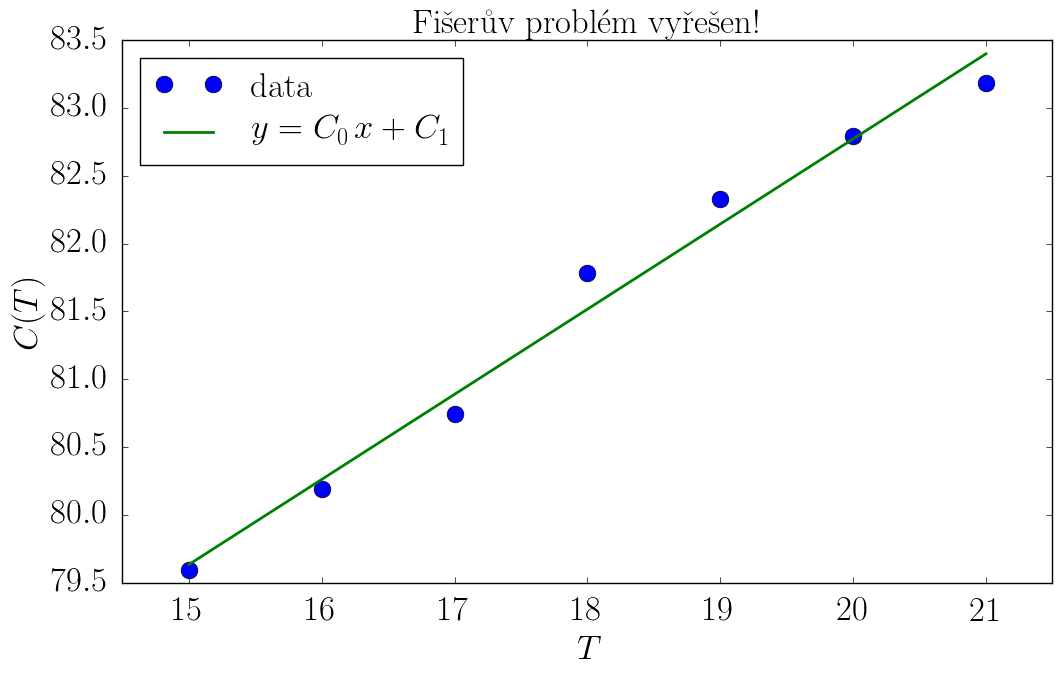

In [17]:
matplotlib.pyplot.plot(data['T'], data['C'], 'o', label='data')
y = f(data['T'], popt[0], popt[1]) # y = C0 * x + C1
matplotlib.pyplot.plot(data['T'], y, label=r'$y = C_0 \, x + C_1$')
matplotlib.pyplot.legend(loc='best')
matplotlib.pyplot.xlim([14.5, 21.5])
matplotlib.pyplot.xlabel(r"$T$")
matplotlib.pyplot.ylabel(r"$C(T)$")
matplotlib.pyplot.title("Fišerův problém vyřešen!")